In [ ]:
pip install psutil pandas matplotlib scikit-learn tensorflow

In [ ]:
import psutil
import time
import pandas as pd
from datetime import datetime

class SystemMonitor:
    def __init__(self):
        self.process_data = []
        self.system_data = []

    def collect_process_data(self):
        """Collect detailed information about all running processes"""
        for proc in psutil.process_iter(['pid', 'name', 'cpu_percent', 'memory_percent',
                                        'num_threads', 'memory_info', 'io_counters']):
            try:
                process_info = {
                    'timestamp': datetime.now(),
                    'pid': proc.info['pid'],
                    'name': proc.info['name'],
                    'cpu_percent': proc.info['cpu_percent'],
                    'memory_percent': proc.info['memory_percent'],
                    'num_threads': proc.info['num_threads'],
                    'rss': proc.info['memory_info'].rss,  # Resident Set Size
                    'vms': proc.info['memory_info'].vms,  # Virtual Memory Size
                    'read_bytes': proc.info['io_counters'].read_bytes if proc.info['io_counters'] else 0,
                    'write_bytes': proc.info['io_counters'].write_bytes if proc.info['io_counters'] else 0,
                }
                self.process_data.append(process_info)
            except (psutil.NoSuchProcess, psutil.AccessDenied):
                continue

    def collect_system_data(self):
        """Collect overall system metrics"""
        system_info = {
            'timestamp': datetime.now(),
            'cpu_percent': psutil.cpu_percent(interval=1),
            'memory_percent': psutil.virtual_memory().percent,
            'disk_io': psutil.disk_io_counters().read_bytes + psutil.disk_io_counters().write_bytes,
            'network_io': psutil.net_io_counters().bytes_sent + psutil.net_io_counters().bytes_recv,
        }
        self.system_data.append(system_info)

    def run(self, duration=60, interval=5):
        """Run monitoring for specified duration"""
        end_time = time.time() + duration
        while time.time() < end_time:
            self.collect_process_data()
            self.collect_system_data()
            time.sleep(interval)

        return pd.DataFrame(self.process_data), pd.DataFrame(self.system_data)

if __name__ == "__main__":
    monitor = SystemMonitor()
    process_df, system_df = monitor.run(duration=30)
    print("Process Data Sample:")
    print(process_df.head())
    print("\nSystem Data Sample:")
    print(system_df.head())

Process Data Sample:
                   timestamp  pid                  name  cpu_percent  \
0 2025-04-06 04:10:56.130626    1           docker-init          0.0   
1 2025-04-06 04:10:56.131006    7                  node          0.0   
2 2025-04-06 04:10:56.131351   21        oom_monitor.sh          0.0   
3 2025-04-06 04:10:56.131731   23                run.sh          0.0   
4 2025-04-06 04:10:56.132211   25  kernel_manager_proxy          0.0   

   memory_percent  num_threads       rss         vms  read_bytes  write_bytes  
0        0.000060            1      8192     1101824     5898240            0  
1        0.440858           11  59998208   859598848   125431808       106496  
2        0.025793            1   3510272     7553024      774144            0  
3        0.013694            1   1863680     7553024           0            0  
4        0.099139            5  13492224  1266151424    10797056            0  

System Data Sample:
                   timestamp  cpu_percent  me

In [ ]:
import psutil
import time
import pandas as pd
from datetime import datetime
import os

class SystemMonitor:
    def __init__(self, save_dir="data"):
        self.process_data = []
        self.system_data = []
        self.save_dir = save_dir
        os.makedirs(self.save_dir, exist_ok=True)

    def collect_process_data(self):
        """Collect detailed information about all running processes"""
        for proc in psutil.process_iter(['pid', 'name', 'cpu_percent', 'memory_percent',
                                        'num_threads', 'memory_info', 'io_counters']):
            try:
                process_info = {
                    'timestamp': datetime.now(),
                    'pid': proc.info['pid'],
                    'name': proc.info['name'],
                    'cpu_percent': proc.info['cpu_percent'],
                    'memory_percent': proc.info['memory_percent'],
                    'num_threads': proc.info['num_threads'],
                    'rss': proc.info['memory_info'].rss,  # Resident Set Size
                    'vms': proc.info['memory_info'].vms,  # Virtual Memory Size
                    'read_bytes': proc.info['io_counters'].read_bytes if proc.info['io_counters'] else 0,
                    'write_bytes': proc.info['io_counters'].write_bytes if proc.info['io_counters'] else 0,
                }
                self.process_data.append(process_info)
            except (psutil.NoSuchProcess, psutil.AccessDenied):
                continue

    def collect_system_data(self):
        """Collect overall system metrics"""
        system_info = {
            'timestamp': datetime.now(),
            'cpu_percent': psutil.cpu_percent(interval=1),
            'memory_percent': psutil.virtual_memory().percent,
            'disk_io': psutil.disk_io_counters().read_bytes + psutil.disk_io_counters().write_bytes,
            'network_io': psutil.net_io_counters().bytes_sent + psutil.net_io_counters().bytes_recv,
        }
        self.system_data.append(system_info)

    def save_data(self):
        """Save collected data to CSV files"""
        process_df = pd.DataFrame(self.process_data)
        system_df = pd.DataFrame(self.system_data)

        process_path = os.path.join(self.save_dir, "process_data.csv")
        system_path = os.path.join(self.save_dir, "system_data.csv")

        process_df.to_csv(process_path, index=False)
        system_df.to_csv(system_path, index=False)

        return process_df, system_df

    def run(self, duration=60, interval=5):
        """Run monitoring for specified duration"""
        end_time = time.time() + duration
        while time.time() < end_time:
            self.collect_process_data()
            self.collect_system_data()
            time.sleep(interval)

        return self.save_data()

if __name__ == "__main__":
    monitor = SystemMonitor()
    process_df, system_df = monitor.run(duration=30)
    print("Process Data Sample:")
    print(process_df.head())
    print("\nSystem Data Sample:")
    print(system_df.head())

Process Data Sample:
                   timestamp  pid                  name  cpu_percent  \
0 2025-04-06 04:13:08.657949    1           docker-init          0.0   
1 2025-04-06 04:13:08.658251    7                  node          0.1   
2 2025-04-06 04:13:08.658517   21        oom_monitor.sh          0.1   
3 2025-04-06 04:13:08.658819   23                run.sh          0.0   
4 2025-04-06 04:13:08.659298   25  kernel_manager_proxy          0.0   

   memory_percent  num_threads       rss         vms  read_bytes  write_bytes  
0        0.000060            1      8192     1101824     5898240            0  
1        0.445101           11  60575744   859598848   125431808       106496  
2        0.025793            1   3510272     7553024      774144            0  
3        0.013694            1   1863680     7553024           0            0  
4        0.104135            5  14172160  1266413568    10797056            0  

System Data Sample:
                   timestamp  cpu_percent  me

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

class DataAnalyzer:
    @staticmethod
    def load_data(save_dir="data"):
        """Load data from CSV files with existence check"""
        process_path = os.path.join(save_dir, "process_data.csv")
        system_path = os.path.join(save_dir, "system_data.csv")

        if not os.path.exists(process_path) or not os.path.exists(system_path):
            raise FileNotFoundError("No data files found. Please run the monitor first.")

        return pd.read_csv(process_path), pd.read_csv(system_path)

    @staticmethod
    def visualize_process_cpu(process_df):
        """Visualize CPU usage by processes"""
        plt.figure(figsize=(12, 8))
        top_cpu = process_df.groupby('name')['cpu_percent'].mean().nlargest(10)
        sns.barplot(x=top_cpu.values, y=top_cpu.index)
        plt.title('Top 10 Processes by CPU Usage')
        plt.xlabel('CPU Percentage')
        plt.ylabel('Process Name')
        plt.tight_layout()
        plt.savefig('cpu_usage.png')
        plt.close()
        print("Saved CPU usage visualization to cpu_usage.png")

    @staticmethod
    def visualize_memory_usage(process_df):
        """Visualize memory usage by processes"""
        plt.figure(figsize=(12, 8))
        top_memory = process_df.groupby('name')['memory_percent'].mean().nlargest(10)
        sns.barplot(x=top_memory.values, y=top_memory.index)
        plt.title('Top 10 Processes by Memory Usage')
        plt.xlabel('Memory Percentage')
        plt.ylabel('Process Name')
        plt.tight_layout()
        plt.savefig('memory_usage.png')
        plt.close()
        print("Saved memory usage visualization to memory_usage.png")

    @staticmethod
    def detect_bottlenecks(process_df, system_df):
        """Identify potential system bottlenecks"""
        bottlenecks = []

        # CPU Bottleneck
        avg_cpu = system_df['cpu_percent'].mean()
        if avg_cpu > 80:
            bottlenecks.append(f"High CPU usage detected ({avg_cpu:.2f}%)")

        # Memory Bottleneck
        avg_mem = system_df['memory_percent'].mean()
        if avg_mem > 80:
            bottlenecks.append(f"High memory usage detected ({avg_mem:.2f}%)")

        # I/O Bottleneck (simplified)
        top_io = process_df.groupby('name')[['read_bytes', 'write_bytes']].sum().sum(axis=1).nlargest(3)
        if len(top_io) > 0:
            bottlenecks.append(f"High I/O processes: {', '.join(top_io.index)}")

        return bottlenecks

if __name__ == "__main__":
    try:
        # Load data
        process_df, system_df = DataAnalyzer.load_data()

        # Perform analysis
        DataAnalyzer.visualize_process_cpu(process_df)
        DataAnalyzer.visualize_memory_usage(process_df)
        bottlenecks = DataAnalyzer.detect_bottlenecks(process_df, system_df)

        print("\nPotential Bottlenecks:")
        for issue in bottlenecks:
            print(f"- {issue}")

    except FileNotFoundError as e:
        print(f"Error: {e}")
        print("Please run the monitor.py script first to collect data.")

Saved CPU usage visualization to cpu_usage.png
Saved memory usage visualization to memory_usage.png

Potential Bottlenecks:
- High I/O processes: python3, node, jupyter-noteboo


Starting performance monitoring...

Monitoring complete. Sample process data:
                   timestamp  pid                  name  cpu_percent  \
0 2025-04-06 04:18:21.652665    1           docker-init          0.0   
1 2025-04-06 04:18:21.652974    7                  node          0.1   
2 2025-04-06 04:18:21.653267   21        oom_monitor.sh          0.1   
3 2025-04-06 04:18:21.653567   23                run.sh          0.0   
4 2025-04-06 04:18:21.653930   25  kernel_manager_proxy          0.0   

   memory_percent  num_threads       rss         vms  read_bytes  write_bytes  
0        0.000060            1      8192     1101824     5898240            0  
1        0.453558           11  61726720   860385280   125431808       106496  
2        0.025793            1   3510272     7553024      774144            0  
3        0.013694            1   1863680     7553024           0            0  
4        0.109251            5  14868480  1267331072    10797056            0  

Sample s

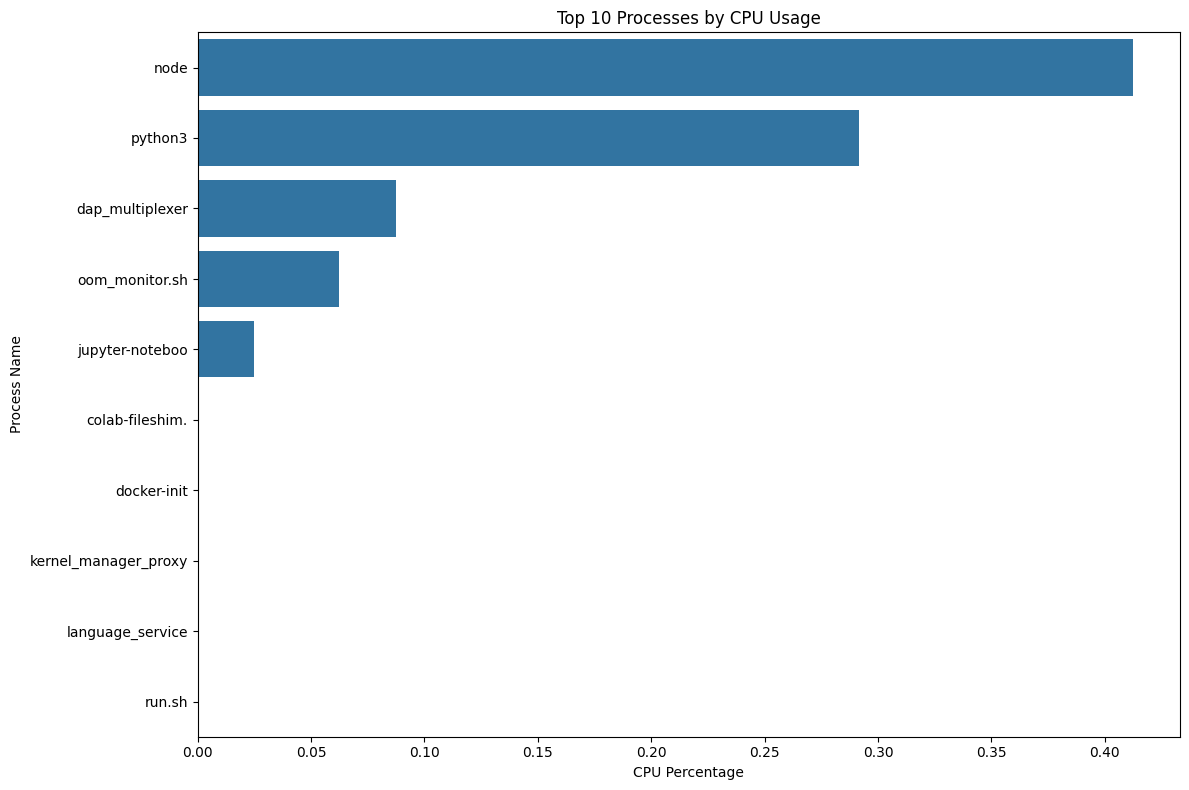

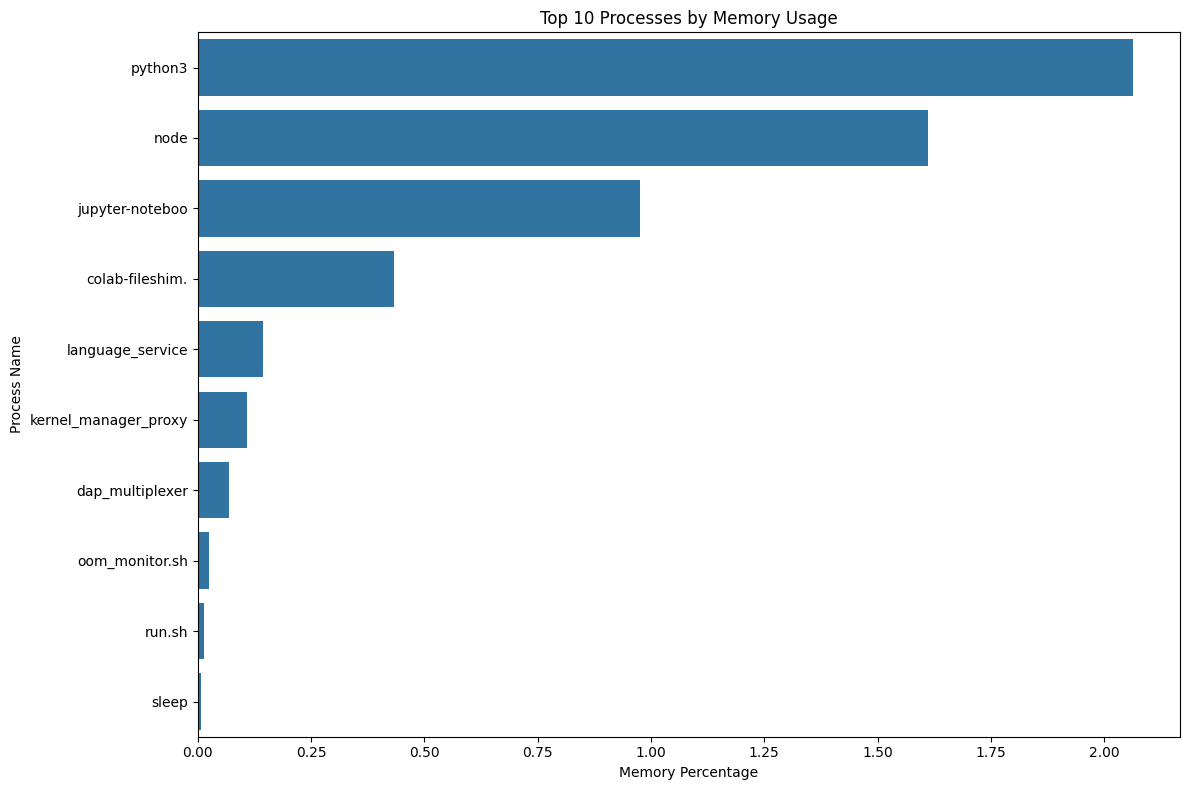


Potential Bottlenecks:
- High I/O processes: python3, node, jupyter-noteboo

Running anomaly detection...

Anomalous Processes Detected:
                     timestamp             name  cpu_percent  memory_percent
11  2025-04-06 04:18:21.656073          python3          2.3        6.039279
14  2025-04-06 04:18:21.656987             node          5.9        2.765171
41  2025-04-06 04:18:29.666342  jupyter-noteboo          0.2        0.975617
43  2025-04-06 04:18:29.666682          python3          0.7        6.039279
107 2025-04-06 04:18:45.685777          python3          0.7        6.039279

Analysis complete!
Would you like to download the collected data? (y/n): y


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Data downloaded successfully!


In [ ]:
# Step 1: Install required packages
!pip install psutil pandas matplotlib scikit-learn tensorflow seaborn

# Step 2: Import libraries
import psutil
import time
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import os
from google.colab import files

# Step 3: System Monitor Class
class SystemMonitor:
    def __init__(self):
        self.process_data = []
        self.system_data = []

    def collect_process_data(self):
        """Collect detailed information about all running processes"""
        for proc in psutil.process_iter(['pid', 'name', 'cpu_percent', 'memory_percent',
                                        'num_threads', 'memory_info', 'io_counters']):
            try:
                process_info = {
                    'timestamp': datetime.now(),
                    'pid': proc.info['pid'],
                    'name': proc.info['name'],
                    'cpu_percent': proc.info['cpu_percent'],
                    'memory_percent': proc.info['memory_percent'],
                    'num_threads': proc.info['num_threads'],
                    'rss': proc.info['memory_info'].rss,  # Resident Set Size
                    'vms': proc.info['memory_info'].vms,  # Virtual Memory Size
                    'read_bytes': proc.info['io_counters'].read_bytes if proc.info['io_counters'] else 0,
                    'write_bytes': proc.info['io_counters'].write_bytes if proc.info['io_counters'] else 0,
                }
                self.process_data.append(process_info)
            except (psutil.NoSuchProcess, psutil.AccessDenied):
                continue

    def collect_system_data(self):
        """Collect overall system metrics"""
        system_info = {
            'timestamp': datetime.now(),
            'cpu_percent': psutil.cpu_percent(interval=1),
            'memory_percent': psutil.virtual_memory().percent,
            'disk_io': psutil.disk_io_counters().read_bytes + psutil.disk_io_counters().write_bytes,
            'network_io': psutil.net_io_counters().bytes_sent + psutil.net_io_counters().bytes_recv,
        }
        self.system_data.append(system_info)

    def run(self, duration=60, interval=5):
        """Run monitoring for specified duration"""
        end_time = time.time() + duration
        while time.time() < end_time:
            self.collect_process_data()
            self.collect_system_data()
            time.sleep(interval)

        # Convert to DataFrames
        process_df = pd.DataFrame(self.process_data)
        system_df = pd.DataFrame(self.system_data)

        # Save to files (in Colab's temporary storage)
        process_df.to_csv('process_data.csv', index=False)
        system_df.to_csv('system_data.csv', index=False)

        return process_df, system_df

# Step 4: Data Analyzer Class
class DataAnalyzer:
    @staticmethod
    def visualize_process_cpu(process_df):
        """Visualize CPU usage by processes"""
        plt.figure(figsize=(12, 8))
        top_cpu = process_df.groupby('name')['cpu_percent'].mean().nlargest(10)
        sns.barplot(x=top_cpu.values, y=top_cpu.index)
        plt.title('Top 10 Processes by CPU Usage')
        plt.xlabel('CPU Percentage')
        plt.ylabel('Process Name')
        plt.tight_layout()
        plt.show()

    @staticmethod
    def visualize_memory_usage(process_df):
        """Visualize memory usage by processes"""
        plt.figure(figsize=(12, 8))
        top_memory = process_df.groupby('name')['memory_percent'].mean().nlargest(10)
        sns.barplot(x=top_memory.values, y=top_memory.index)
        plt.title('Top 10 Processes by Memory Usage')
        plt.xlabel('Memory Percentage')
        plt.ylabel('Process Name')
        plt.tight_layout()
        plt.show()

    @staticmethod
    def detect_bottlenecks(process_df, system_df):
        """Identify potential system bottlenecks"""
        bottlenecks = []

        # CPU Bottleneck
        avg_cpu = system_df['cpu_percent'].mean()
        if avg_cpu > 80:
            bottlenecks.append(f"High CPU usage detected ({avg_cpu:.2f}%)")

        # Memory Bottleneck
        avg_mem = system_df['memory_percent'].mean()
        if avg_mem > 80:
            bottlenecks.append(f"High memory usage detected ({avg_mem:.2f}%)")

        # I/O Bottleneck (simplified)
        top_io = process_df.groupby('name')[['read_bytes', 'write_bytes']].sum().sum(axis=1).nlargest(3)
        if len(top_io) > 0:
            bottlenecks.append(f"High I/O processes: {', '.join(top_io.index)}")

        return bottlenecks

# Step 5: Anomaly Detection Class
class AnomalyDetector:
    def __init__(self):
        self.model = IsolationForest(contamination=0.05, random_state=42)
        self.scaler = StandardScaler()

    def train(self, process_df):
        """Train anomaly detection model"""
        features = process_df[['cpu_percent', 'memory_percent', 'num_threads', 'rss', 'vms']]
        scaled_features = self.scaler.fit_transform(features)
        self.model.fit(scaled_features)

    def detect_anomalies(self, process_df):
        """Detect anomalous processes"""
        features = process_df[['cpu_percent', 'memory_percent', 'num_threads', 'rss', 'vms']]
        scaled_features = self.scaler.transform(features)
        anomalies = self.model.predict(scaled_features)
        process_df['anomaly'] = anomalies
        return process_df[process_df['anomaly'] == -1]

# Step 6: Run the complete analysis
def run_complete_analysis(duration=60, interval=5):
    print("Starting performance monitoring...")

    # 1. Run monitoring
    monitor = SystemMonitor()
    process_df, system_df = monitor.run(duration=duration, interval=interval)

    print("\nMonitoring complete. Sample process data:")
    print(process_df.head())
    print("\nSample system data:")
    print(system_df.head())

    # 2. Basic analysis
    print("\nPerforming basic analysis...")
    DataAnalyzer.visualize_process_cpu(process_df)
    DataAnalyzer.visualize_memory_usage(process_df)
    bottlenecks = DataAnalyzer.detect_bottlenecks(process_df, system_df)

    print("\nPotential Bottlenecks:")
    for issue in bottlenecks:
        print(f"- {issue}")

    # 3. Anomaly detection
    print("\nRunning anomaly detection...")
    detector = AnomalyDetector()
    detector.train(process_df)
    anomalies = detector.detect_anomalies(process_df)

    print("\nAnomalous Processes Detected:")
    if not anomalies.empty:
        print(anomalies[['timestamp', 'name', 'cpu_percent', 'memory_percent']])
    else:
        print("No anomalies detected")

    # 4. Offer to download data
    print("\nAnalysis complete!")
    download = input("Would you like to download the collected data? (y/n): ")
    if download.lower() == 'y':
        files.download('process_data.csv')
        files.download('system_data.csv')
        print("Data downloaded successfully!")

# Step 7: Run the analysis (you can adjust duration and interval)
run_complete_analysis(duration=30, interval=3)

In [ ]:
# Install required packages
!pip install flask-ngrok psutil pandas matplotlib scikit-learn tensorflow seaborn

# Import libraries
from flask import Flask, render_template_string, request
from flask_ngrok import run_with_ngrok
import psutil
import time
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import io
import base64

# Initialize Flask app
app = Flask(__name__)
run_with_ngrok(app)  # This makes the app accessible via public URL in Colab

# System Monitor Class
class SystemMonitor:
    def __init__(self):
        self.process_data = []
        self.system_data = []

    def collect_process_data(self):
        """Collect detailed information about all running processes"""
        for proc in psutil.process_iter(['pid', 'name', 'cpu_percent', 'memory_percent']):
            try:
                process_info = {
                    'timestamp': datetime.now(),
                    'pid': proc.info['pid'],
                    'name': proc.info['name'],
                    'cpu_percent': proc.info['cpu_percent'],
                    'memory_percent': proc.info['memory_percent']
                }
                self.process_data.append(process_info)
            except (psutil.NoSuchProcess, psutil.AccessDenied):
                continue

    def collect_system_data(self):
        """Collect overall system metrics"""
        system_info = {
            'timestamp': datetime.now(),
            'cpu_percent': psutil.cpu_percent(interval=1),
            'memory_percent': psutil.virtual_memory().percent
        }
        self.system_data.append(system_info)

    def run(self, duration=60, interval=5):
        """Run monitoring for specified duration"""
        end_time = time.time() + duration
        while time.time() < end_time:
            self.collect_process_data()
            self.collect_system_data()
            time.sleep(interval)

        # Convert to DataFrames
        process_df = pd.DataFrame(self.process_data)
        system_df = pd.DataFrame(self.system_data)

        return process_df, system_df

# Data Analyzer Class
class WebDataAnalyzer:
    @staticmethod
    def plot_to_base64(plt):
        """Convert matplotlib plot to base64 image"""
        img = io.BytesIO()
        plt.savefig(img, format='png', bbox_inches='tight')
        img.seek(0)
        return base64.b64encode(img.getvalue()).decode()

    @staticmethod
    def visualize_process_cpu(process_df):
        """Visualize CPU usage by processes"""
        plt.figure(figsize=(10, 6))
        top_cpu = process_df.groupby('name')['cpu_percent'].mean().nlargest(10)
        sns.barplot(x=top_cpu.values, y=top_cpu.index)
        plt.title('Top 10 Processes by CPU Usage')
        plt.xlabel('CPU Percentage')
        plt.ylabel('Process Name')
        img = WebDataAnalyzer.plot_to_base64(plt)
        plt.close()
        return img

    @staticmethod
    def visualize_memory_usage(process_df):
        """Visualize memory usage by processes"""
        plt.figure(figsize=(10, 6))
        top_memory = process_df.groupby('name')['memory_percent'].mean().nlargest(10)
        sns.barplot(x=top_memory.values, y=top_memory.index)
        plt.title('Top 10 Processes by Memory Usage')
        plt.xlabel('Memory Percentage')
        plt.ylabel('Process Name')
        img = WebDataAnalyzer.plot_to_base64(plt)
        plt.close()
        return img

# HTML Templates
INDEX_HTML = """
<!DOCTYPE html>
<html>
<head>
    <title>AI Performance Analyzer</title>
    <style>
        body { font-family: Arial, sans-serif; max-width: 800px; margin: 0 auto; padding: 20px; }
        .form-group { margin-bottom: 15px; }
        label { display: block; margin-bottom: 5px; }
        input { padding: 8px; width: 100%; box-sizing: border-box; }
        button { background: #4CAF50; color: white; border: none; padding: 10px 15px; cursor: pointer; }
        .loading { display: none; margin: 20px 0; }
    </style>
</head>
<body>
    <h1>AI Performance Analyzer</h1>
    <form action="/monitor" method="post" onsubmit="document.getElementById('loading').style.display='block'">
        <div class="form-group">
            <label for="duration">Monitoring Duration (seconds):</label>
            <input type="number" id="duration" name="duration" value="30" min="5" max="300" required>
        </div>
        <div class="form-group">
            <label for="interval">Sampling Interval (seconds):</label>
            <input type="number" id="interval" name="interval" value="5" min="1" max="60" required>
        </div>
        <button type="submit">Start Analysis</button>
        <div id="loading" class="loading">
            <p>Monitoring in progress... Please wait.</p>
        </div>
    </form>
</body>
</html>
"""

RESULTS_HTML = """
<!DOCTYPE html>
<html>
<head>
    <title>Analysis Results</title>
    <style>
        body { font-family: Arial, sans-serif; max-width: 800px; margin: 0 auto; padding: 20px; }
        .stats { background: #f5f5f5; padding: 15px; margin-bottom: 20px; border-radius: 5px; }
        .stat-item { margin-bottom: 8px; }
        .results img { max-width: 100%; margin: 15px 0; border: 1px solid #ddd; border-radius: 4px; }
        .back-btn { display: inline-block; margin-top: 20px; background: #333; color: white; padding: 8px 15px; text-decoration: none; border-radius: 4px; }
        h2 { color: #2c3e50; border-bottom: 1px solid #eee; padding-bottom: 5px; }
    </style>
</head>
<body>
    <h1>Analysis Results</h1>

    <div class="stats">
        <h2>System Overview</h2>
        <div class="stat-item"><strong>Average CPU Usage:</strong> {{ cpu_avg }}%</div>
        <div class="stat-item"><strong>Average Memory Usage:</strong> {{ mem_avg }}%</div>
        <div class="stat-item"><strong>Most CPU Intensive Process:</strong> {{ top_process }}</div>
        <div class="stat-item"><strong>Total Processes Monitored:</strong> {{ process_count }}</div>
    </div>

    <h2>CPU Usage</h2>
    <div class="results">
        <img src="data:image/png;base64,{{ cpu_img }}" alt="CPU Usage">
    </div>

    <h2>Memory Usage</h2>
    <div class="results">
        <img src="data:image/png;base64,{{ mem_img }}" alt="Memory Usage">
    </div>

    <a href="/" class="back-btn">Run Another Analysis</a>
</body>
</html>
"""

# Flask Routes
@app.route('/')
def index():
    return render_template_string(INDEX_HTML)

@app.route('/monitor', methods=['POST'])
def monitor():
    duration = int(request.form.get('duration', 30))
    interval = int(request.form.get('interval', 5))

    monitor = SystemMonitor()
    process_df, system_df = monitor.run(duration=duration, interval=interval)

    # Generate visualizations
    analyzer = WebDataAnalyzer()
    cpu_img = analyzer.visualize_process_cpu(process_df)
    mem_img = analyzer.visualize_memory_usage(process_df)

    # Basic stats
    stats = {
        'cpu_avg': round(system_df['cpu_percent'].mean(), 2),
        'mem_avg': round(system_df['memory_percent'].mean(), 2),
        'top_process': process_df.loc[process_df['cpu_percent'].idxmax(), 'name'],
        'process_count': len(process_df['name'].unique()),
        'cpu_img': cpu_img,
        'mem_img': mem_img
    }

    return render_template_string(RESULTS_HTML, **stats)

# Run the app
print("Starting Flask server... Click the ngrok link below to access the app!")
app.run()

Starting Flask server... Click the ngrok link below to access the app!
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-8:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
            

In [ ]:
# Install required packages
!pip install flask-ngrok pyngrok psutil pandas matplotlib seaborn
!ngrok config add-authtoken 2vLAW6Oz4cUFUXDUFL3fwC4Jznw_32FNPRiGK3g3m1YFvD3nh  # Replace with your ngrok auth token (get from https://dashboard.ngrok.com/get-started/your-authtoken)

from flask import Flask, render_template_string, request
from pyngrok import ngrok
import psutil
import time
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import io
import base64
import threading

# Initialize Flask app
app = Flask(__name__)

# Start ngrok tunnel
public_url = ngrok.connect(5000).public_url
print(f" * Public URL: {public_url}")

# System Monitor Class
class SystemMonitor:
    def __init__(self):
        self.process_data = []
        self.system_data = []

    def collect_process_data(self):
        for proc in psutil.process_iter(['pid', 'name', 'cpu_percent', 'memory_percent']):
            try:
                self.process_data.append({
                    'timestamp': datetime.now(),
                    'pid': proc.info['pid'],
                    'name': proc.info['name'],
                    'cpu_percent': proc.info['cpu_percent'],
                    'memory_percent': proc.info['memory_percent']
                })
            except (psutil.NoSuchProcess, psutil.AccessDenied):
                continue

    def collect_system_data(self):
        self.system_data.append({
            'timestamp': datetime.now(),
            'cpu_percent': psutil.cpu_percent(interval=1),
            'memory_percent': psutil.virtual_memory().percent
        })

    def run(self, duration=30, interval=5):
        end_time = time.time() + duration
        while time.time() < end_time:
            self.collect_process_data()
            self.collect_system_data()
            time.sleep(interval)
        return pd.DataFrame(self.process_data), pd.DataFrame(self.system_data)

# Data Visualization
def plot_to_base64(plt):
    img = io.BytesIO()
    plt.savefig(img, format='png', bbox_inches='tight')
    img.seek(0)
    return base64.b64encode(img.getvalue()).decode()

# HTML Templates
index_html = """
<!doctype html>
<html>
<head>
    <title>Performance Analyzer</title>
    <style>
        body { font-family: Arial, sans-serif; max-width: 600px; margin: auto; padding: 20px; }
        form { background: #f5f5f5; padding: 20px; border-radius: 5px; }
        .form-group { margin-bottom: 15px; }
        label { display: block; margin-bottom: 5px; }
        input { width: 100%; padding: 8px; box-sizing: border-box; }
        button { background: #4CAF50; color: white; border: none; padding: 10px 15px; cursor: pointer; }
    </style>
</head>
<body>
    <h1>AI Performance Analyzer</h1>
    <form action="/monitor" method="post">
        <div class="form-group">
            <label for="duration">Duration (seconds):</label>
            <input type="number" id="duration" name="duration" value="30" min="5" max="300" required>
        </div>
        <div class="form-group">
            <label for="interval">Interval (seconds):</label>
            <input type="number" id="interval" name="interval" value="5" min="1" max="60" required>
        </div>
        <button type="submit">Start Monitoring</button>
    </form>
</body>
</html>
"""

results_html = """
<!doctype html>
<html>
<head>
    <title>Results</title>
    <style>
        body { font-family: Arial, sans-serif; max-width: 800px; margin: auto; padding: 20px; }
        .stats { background: #f5f5f5; padding: 15px; border-radius: 5px; margin-bottom: 20px; }
        img { max-width: 100%; margin: 10px 0; }
        a { display: inline-block; margin-top: 15px; color: #4CAF50; }
    </style>
</head>
<body>
    <h1>Analysis Results</h1>
    <div class="stats">
        <h3>System Overview</h3>
        <p><strong>Avg CPU:</strong> {{ cpu_avg }}%</p>
        <p><strong>Avg Memory:</strong> {{ mem_avg }}%</p>
        <p><strong>Top Process:</strong> {{ top_process }}</p>
    </div>
    <h3>CPU Usage</h3>
    <img src="data:image/png;base64,{{ cpu_img }}" alt="CPU Usage">
    <h3>Memory Usage</h3>
    <img src="data:image/png;base64,{{ mem_img }}" alt="Memory Usage">
    <a href="/">Run Another Analysis</a>
</body>
</html>
"""

# Flask Routes
@app.route('/')
def index():
    return render_template_string(index_html)

@app.route('/monitor', methods=['POST'])
def monitor():
    duration = int(request.form['duration'])
    interval = int(request.form['interval'])

    monitor = SystemMonitor()
    process_df, system_df = monitor.run(duration, interval)

    # Visualizations
    plt.figure(figsize=(10, 6))
    top_cpu = process_df.groupby('name')['cpu_percent'].mean().nlargest(10)
    sns.barplot(x=top_cpu.values, y=top_cpu.index)
    plt.title('Top CPU Processes')
    cpu_img = plot_to_base64(plt)
    plt.close()

    plt.figure(figsize=(10, 6))
    top_mem = process_df.groupby('name')['memory_percent'].mean().nlargest(10)
    sns.barplot(x=top_mem.values, y=top_mem.index)
    plt.title('Top Memory Processes')
    mem_img = plot_to_base64(plt)
    plt.close()

    return render_template_string(results_html,
        cpu_avg=round(system_df['cpu_percent'].mean(), 1),
        mem_avg=round(system_df['memory_percent'].mean(), 1),
        top_process=process_df.loc[process_df['cpu_percent'].idxmax(), 'name'],
        cpu_img=cpu_img,
        mem_img=mem_img
    )

# Run Flask in a thread
threading.Thread(target=app.run, kwargs={'use_reloader': False}).start()

print(f"\n * Open this URL in your browser: {public_url}")
print(" * Press Ctrl+C in Colab to stop the server")

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
 * Public URL: https://6beb-35-227-90-189.ngrok-free.app

 * Open this URL in your browser: https://6beb-35-227-90-189.ngrok-free.app
 * Press Ctrl+C in Colab to stop the server


In [2]:
!git config --global user.email "sudhanshusuman12612@gmail.com"
!git config --global user.name "sudhanshu-079"
!git clone https://github.com/sudhanshu-079/ai-performance-analyzer.git
%cd ai-performance-analyzer


Cloning into 'ai-performance-analyzer'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (5/5), done.
/content/ai-performance-analyzer


In [4]:
!cp /content/OSPRO17.ipynb /content/ai-performance-analyzer/app.ipynb


cp: cannot stat '/content/OSPRO17.ipynb': No such file or directory


In [7]:
!find /content -name "*.ipynb"


In [8]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [9]:
!cp "/content/drive/MyDrive/Colab Notebooks/OSPRO17.ipynb" /content/ai-performance-analyzer/app.ipynb
